In [321]:
import matplotlib.pyplot as plt
import pandas as pd

In [322]:
#Lecutura de datos
data = pd.read_excel('datasets/MigrantesChile (2005-2016).xlsx')
#Cambiamos el index en vez de tener el de defecto
data.set_index('Country', inplace=True)
#Calulamos el total,es decir, la suma de las cantidades de los años y lo dejamos como una columna
data['Total'] = data.iloc[:, 3:].sum(axis=1)
#Ordenamos los datos de mayor a menor
data = data.sort_values('Total',ascending=False)
#Nos quedamos con los 5 mayores en cuanto al total
data = data.head(5)
#Borramos las columnas que no nos interesan
data = data.drop(['Continent','ID Country','ID Continent'],axis=1)

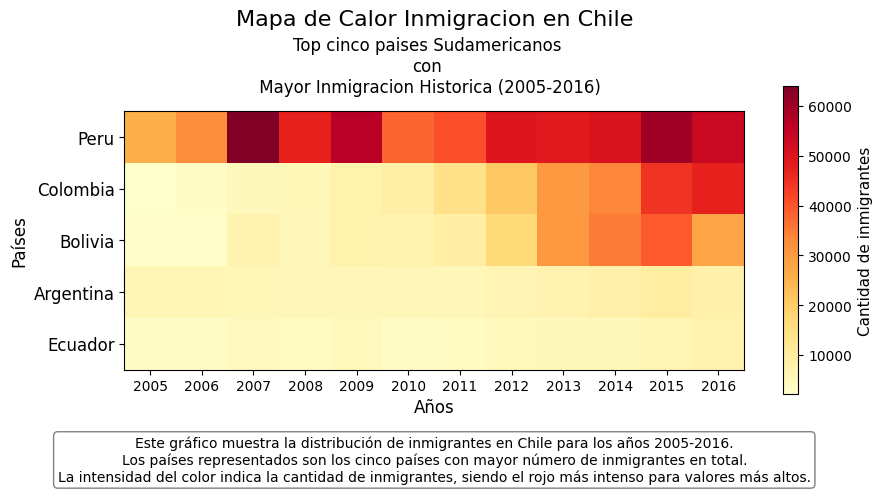

In [323]:
#Creamos el heatMap
datos_heatmap = data.drop('Total', axis=1).T.values
data = data.drop('Total', axis=1)

#Ajustamos el tamaño del grafico
plt.figure(figsize=(10, 8))
#Podemos darle una paleta de colores con cmap
plt.imshow(datos_heatmap.T, cmap='YlOrRd')

# Configurar los ejes y etiquetas
plt.yticks(range(len(data)), data.index,fontsize=12)
plt.xticks(range(len(data.columns)), data.columns)
plt.xlabel('Años',fontsize=12)
plt.ylabel('Países',fontsize=12)

#Agregar titulo y subtitulo
plt.title('Mapa de Calor Inmigracion en Chile', fontsize=16,y=1.3)
plt.suptitle('Top cinco paises Sudamericanos\ncon\n Mayor Inmigracion Historica (2005-2016)', fontsize=12,x=0.428, y=0.75)

# Agregar una barra de color, se ajusta el tamaño con shrink, tambien se puede usar
# aspect pero son diferentes
colorbar = plt.colorbar(label='Número de inmigrantes', pad=0.05,shrink=0.5)

# Agregar el título al colorbar
colorbar.set_label('Cantidad de inmigrantes', fontsize=11)

# Agregar un cuadro de texto explicativo
texto_explicativo = "Este gráfico muestra la distribución de inmigrantes en Chile para los años 2005-2016.\nLos países representados son los cinco países con mayor número de inmigrantes en total.\nLa intensidad del color indica la cantidad de inmigrantes, siendo el rojo más intenso para valores más altos."

# "0.5,-0.35" son las coordenadas

# ha='center', va='center': Estos parámetros controlan la alineación horizontal (ha) 
# y vertical (va) del texto. 'center' indica que el texto se alineará en el centro tanto horizontal como verticalmente.

# transform=plt.gca().transAxes: Este parámetro establece la transformación del sistema de coordenadas para el texto. 
# plt.gca() obtiene los ejes actuales y .transAxes indica que se utilizará el sistema de coordenadas de los ejes del gráfico.

# bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'): Este parámetro define el estilo del cuadro de texto que 
# rodea al texto explicativo. Aquí se ha especificado un cuadro de color blanco con bordes grises y con forma redondeada ('round').

plt.text(0.5, -0.35, texto_explicativo, fontsize=10, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

# Mostrar el heatmap
plt.show()